In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('data/dados_tratados.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Q1                                     4501 non-null   float64
 1   Q2                                     4501 non-null   float64
 2   Q3                                     4501 non-null   float64
 3   Q4                                     4501 non-null   float64
 4   Q5                                     4501 non-null   float64
 5   Q6                                     4501 non-null   float64
 6   Q7                                     4501 non-null   float64
 7   Q8                                     4501 non-null   float64
 8   Q9                                     4501 non-null   float64
 9   genero                                 4501 non-null   object 
 10  idade                                  4501 non-null   int64  
 11  raca

## Análise exploratória

### Identificar corretamente quais variáveis são qualitativas e quais são quantitativas <br>
  - Qualitativas: genero, raça, escolaridade <br>
  - Quantitativas: Q [1-9], idade, renda_anual_familiar, tempo_atividade_semanal_pag, aderencia_pag, total_[vegetais-acucar], score_saude. <br>

In [35]:
qualitativas = ['raca',
 'escolaridade',
 'aderencia_pag',
 'genero']

quantitativas = ['idade',
 'renda_anual_familiar',  
 'tempo_atividade_semanal_pag',
 'total_vegetais',
 'total_verdura-v-escura-leguminosas',
 'total_frutas',
 'total_frutas_in-natura',
 'total_graos-integrais',
 'total_laticinios',
 'total_proteinas',
 'total_planta-marinha-proteina-vegetal',
 'total_acido-graxo',
 'total_sodio',
 'total_graos-refinados',
 'total_gordura-saturada',
 'total_acucar-adicionado',
 'score_saude',
 'Q_somatorio']

#### 1 semana tem 168 horas, que sao 10800 minutos. É impossível alguém se exercitar 10777 min por semana.

Devido isso resolvi deixar como máximo de tempo em 3600 minutos.

In [36]:
df["tempo_atividade_semanal_pag"] = np.where(df["tempo_atividade_semanal_pag"]>= 3600, 3600, df["tempo_atividade_semanal_pag"])

### Para medidas quantitativas, podemos usar medidas de posição e dispersão e para gráficos como histogramas ou de densidade:


In [37]:
df[quantitativas].describe()

,idade,renda_anual_familiar,tempo_atividade_semanal_pag,total_vegetais,total_verdura-v-escura-leguminosas,total_frutas,total_frutas_in-natura,total_graos-integrais,total_laticinios,total_proteinas,total_planta-marinha-proteina-vegetal,total_acido-graxo,total_sodio,total_graos-refinados,total_gordura-saturada,total_acucar-adicionado,score_saude,Q_somatorio
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,44.575206,6.880915,471.862132,3.205028,1.804450,2.469448,2.343207,1.767477,3.769149,4.439635,2.583338,4.695944,4.723338,5.827996,6.021029,6.200732,49.850771,0.265052
std,19.637276,3.080338,671.687241,1.456811,2.135055,1.950514,2.169331,1.908437,1.588130,0.998291,2.169316,3.229694,3.400183,3.478052,3.179005,3.339723,12.355179,0.563480
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000
25%,27.000000,4.000000,50.000000,2.069101,0.000000,0.422817,0.000000,0.000000,2.622205,4.181954,0.000000,1.999912,1.555812,3.001105,3.643358,3.711599,40.870595,0.000000
50%,42.000000,7.000000,221.709007,3.209272,0.092971,2.274465,2.025843,1.038933,4.934570,5.000000,2.553354,4.441589,4.806310,6.252632,6.335180,6.861746,49.374430,0.000000
75%,61.000000,10.000000,590.069284,4.799923,4.438245,4.889049,5.000000,3.377386,5.000000,5.000000,5.000000,7.226499,7.583141,9.294017,8.948751,9.397067,58.005762,0.000000
max,85.000000,11.000000,3600.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,2.000000


### Histogramas:

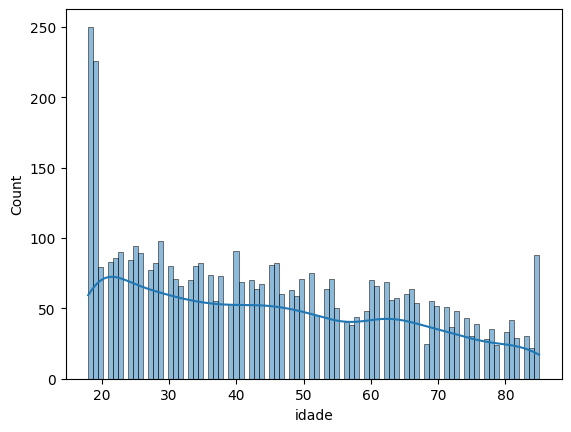

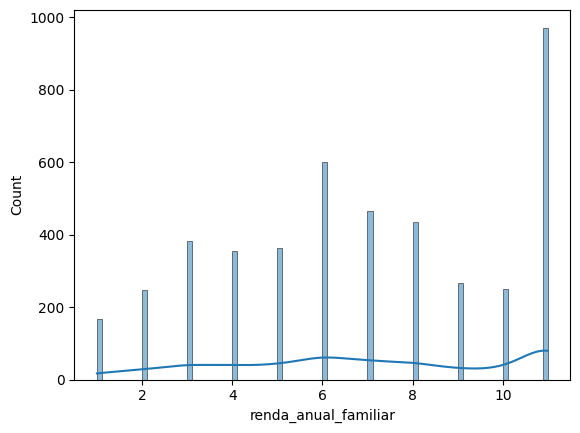

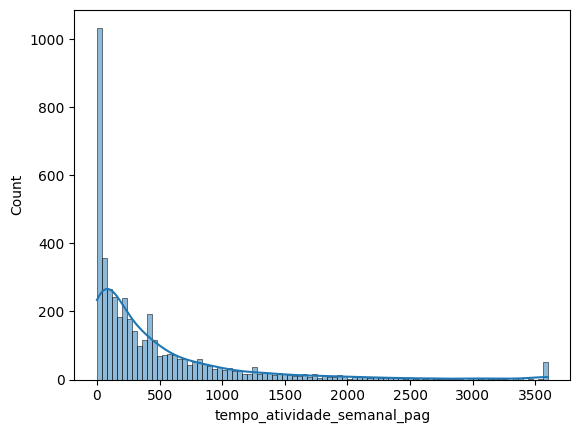

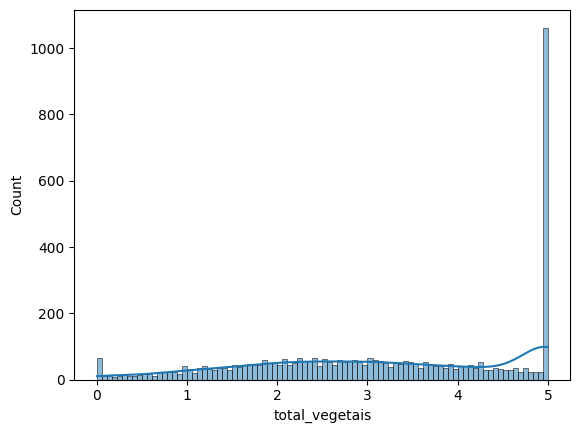

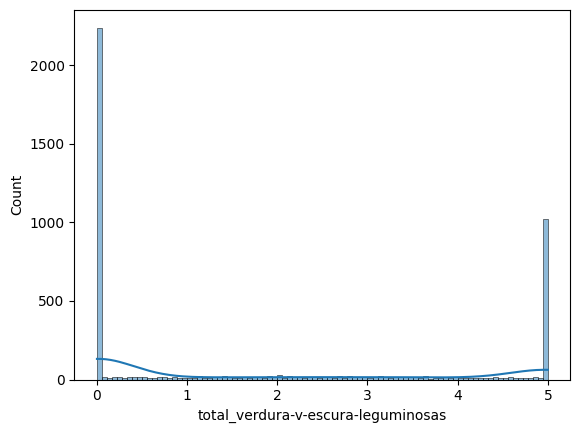

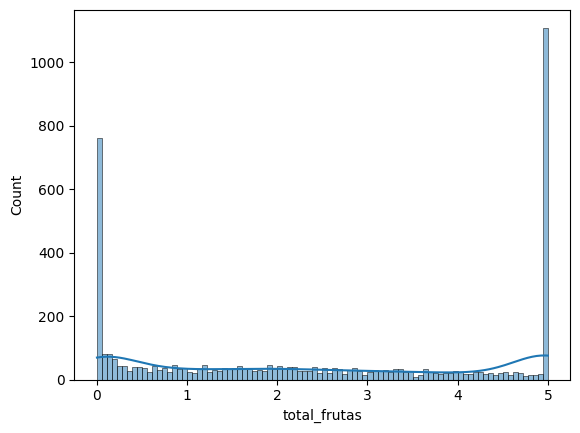

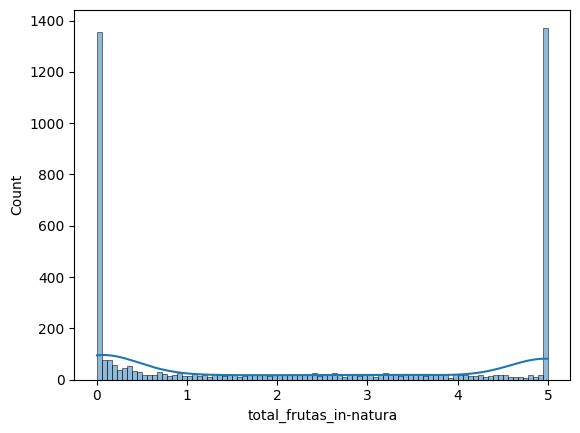

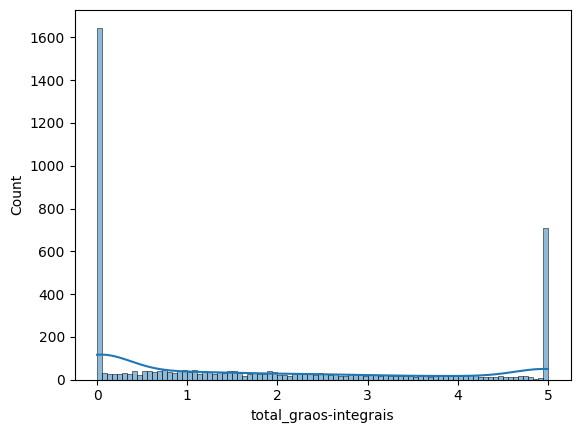

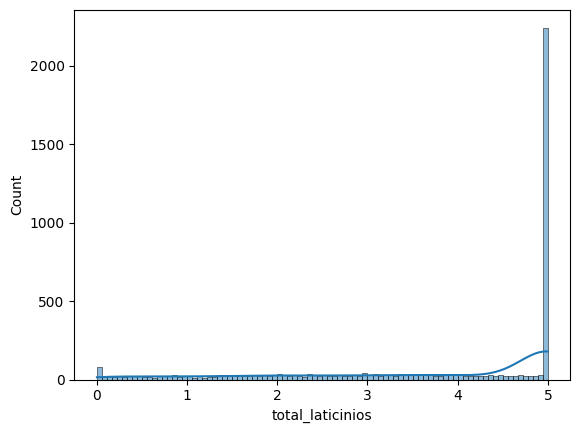

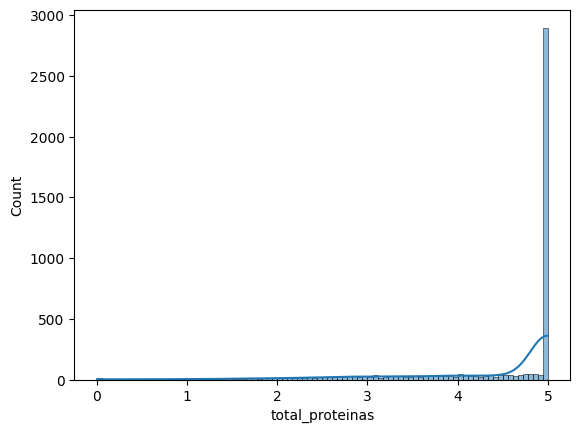

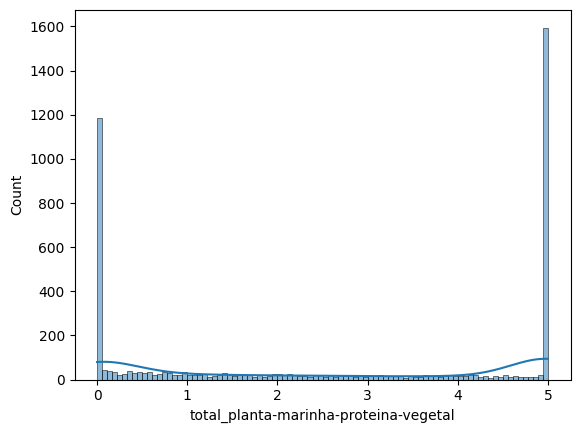

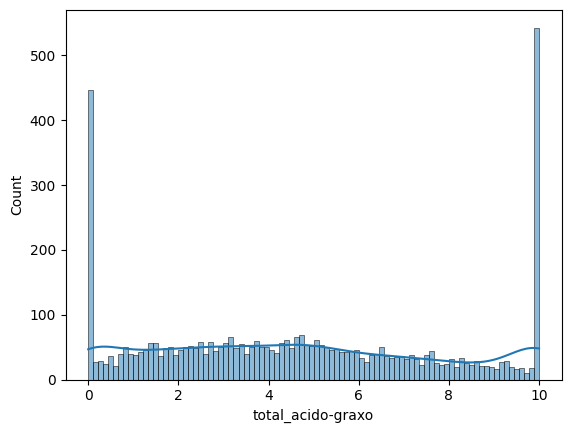

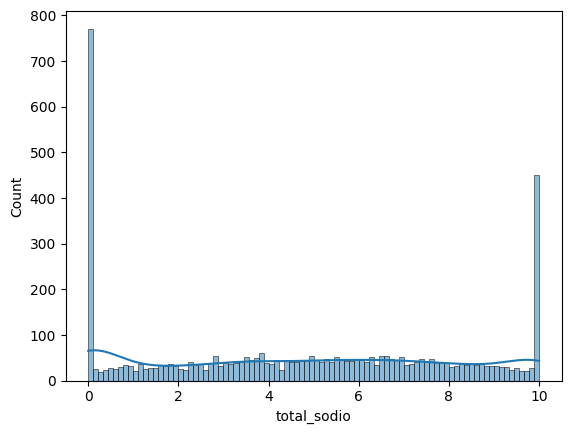

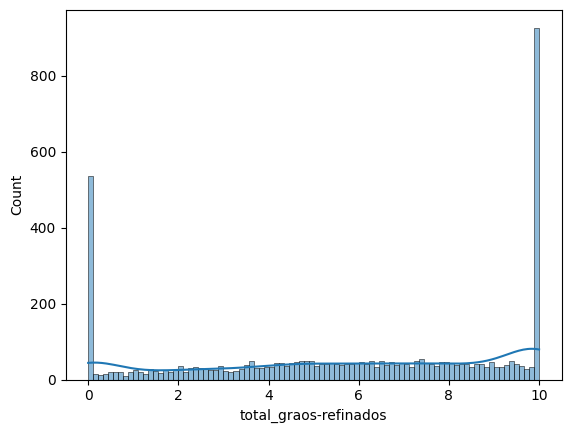

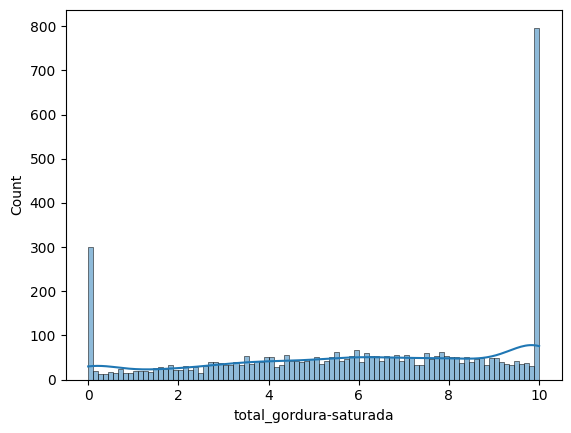

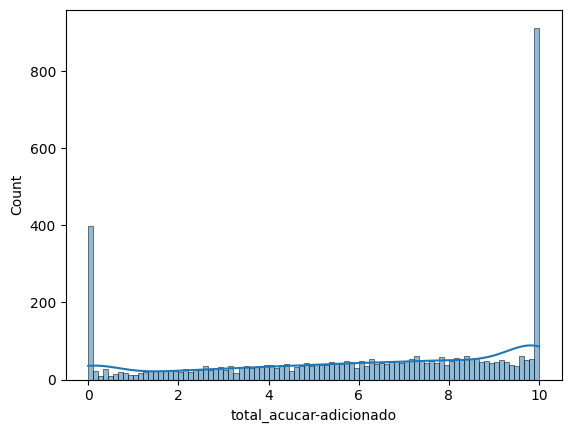

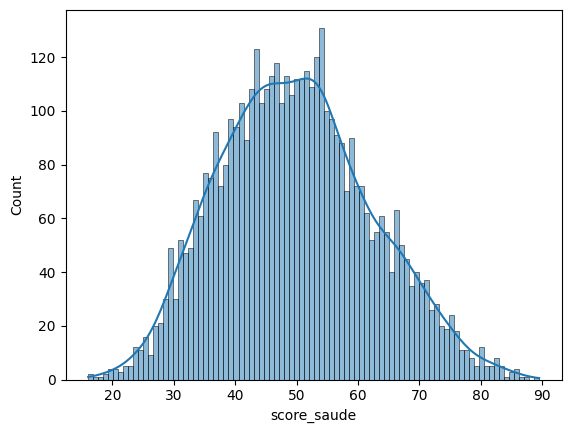

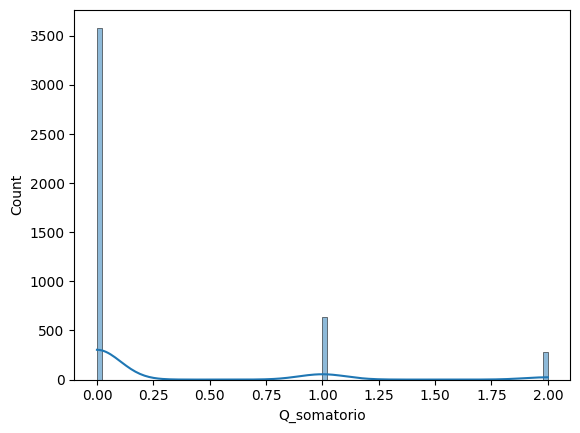

In [55]:
for i in quantitativas:
    sns.histplot(data=df[i], bins=90, legend=True, kde=True)
    plt.show()

### Para variáveis qualitativas:

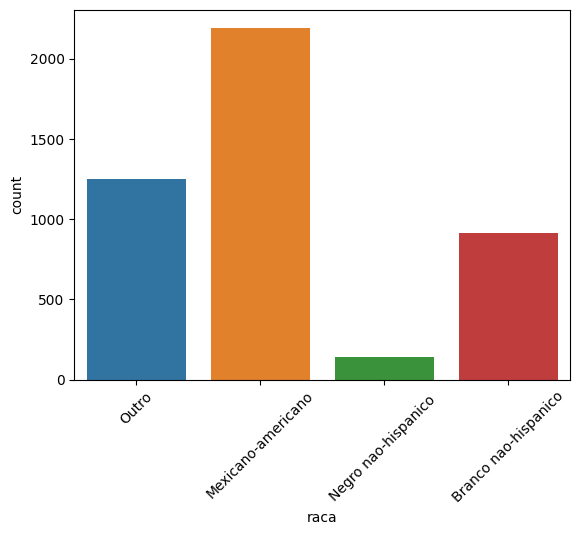

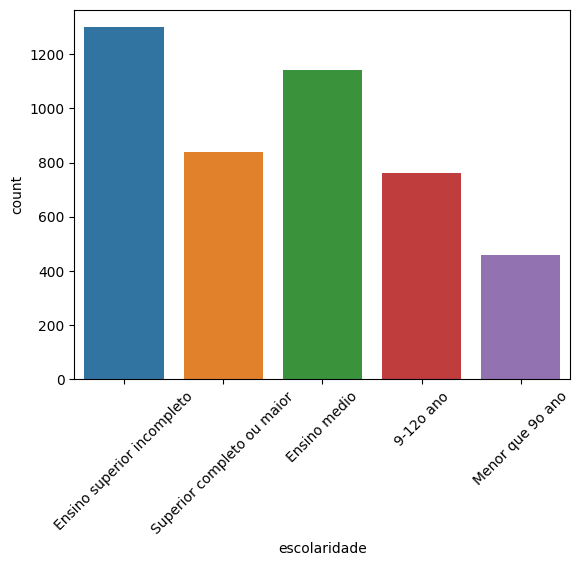

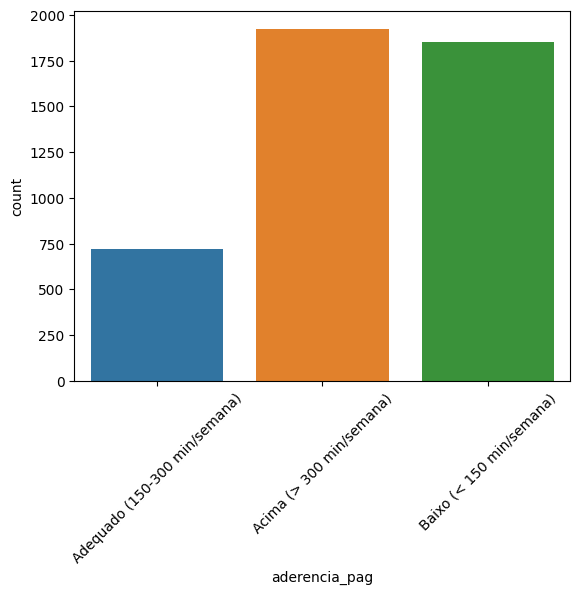

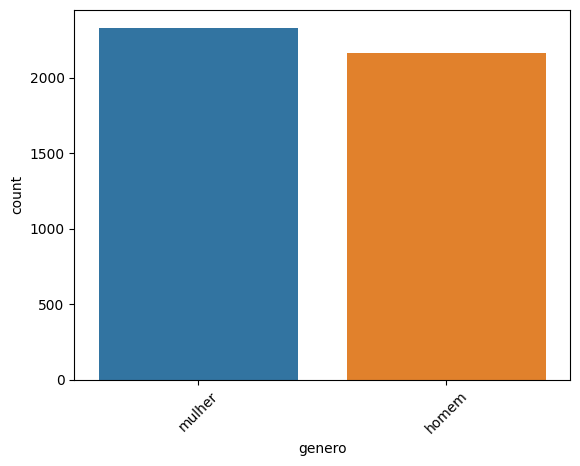

In [57]:
for i in qualitativas:
    sns.countplot(x=df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:

In [58]:
menos_uma_semana = (df.Q1.value_counts(normalize=True) * 100)[1]
uma_semana_ou_mais = (df.Q1.value_counts(normalize=True).round(4) * 100)[2]
print('Pouco interesse ou pouco prazer em fazer as coisas: ')
print(f'Nenhuma vez         - {(df.Q1.value_counts(normalize=True).round(4) * 100)[0]} %')
print(f'Menos de uma semana - {menos_uma_semana:.2f} %')
print(f'Uma semana ou mais  -  {uma_semana_ou_mais:.2f} %')
print(f'Quase todos os dias -  {(df.Q1.value_counts(normalize=True).round(4) * 100)[3]} %')

Pouco interesse ou pouco prazer em fazer as coisas: 
Nenhuma vez         - 80.23 %
Menos de uma semana - 13.64 %
Uma semana ou mais  -  3.69 %
Quase todos os dias -  2.44 %


In [59]:
print('Se sentiu para baixo, deprimido(a) ou sem perspectiva')
df.Q2.value_counts(normalize=True).round(4) * 100

Se sentiu para baixo, deprimido(a) ou sem perspectiva


0.0    78.40
1.0    15.69
2.0     3.69
3.0     2.22
Name: Q2, dtype: float64

In [60]:
print('Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume')
df.Q3.value_counts(normalize=True).round(4) * 100

Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume


0.0    65.45
1.0    22.59
3.0     6.15
2.0     5.80
Name: Q3, dtype: float64

In [61]:
print('Se sentiu cansado(a) ou com pouca energia')
df.Q4.value_counts(normalize=True).round(4) * 100

Se sentiu cansado(a) ou com pouca energia


0.0    50.43
1.0    35.75
2.0     7.49
3.0     6.33
Name: Q4, dtype: float64

In [62]:
print('Falta de apetite ou comeu demais')
df.Q5.value_counts(normalize=True).round(4) * 100

Falta de apetite ou comeu demais


0.0    79.16
1.0    14.26
2.0     3.33
3.0     3.24
Name: Q5, dtype: float64

In [63]:
print('Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)')
df.Q6.value_counts(normalize=True).round(4) * 100

Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)


0.0    85.71
1.0    10.58
2.0     2.02
3.0     1.69
Name: Q6, dtype: float64

In [64]:
print('Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)')
df.Q7.value_counts(normalize=True).round(4) * 100

Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)


0.0    84.43
1.0    11.22
2.0     2.29
3.0     2.07
Name: Q7, dtype: float64

In [65]:
print('Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, \nesteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume')
df.Q8.value_counts(normalize=True).round(4) * 100

Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, 
esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume


0.0    90.40
1.0     7.04
2.0     1.62
3.0     0.93
Name: Q8, dtype: float64

In [66]:
print('Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)')
df.Q9.value_counts(normalize=True).round(4) * 100

Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)


0.0    96.76
1.0     2.36
2.0     0.62
3.0     0.27
Name: Q9, dtype: float64

In [67]:
print(f'Porcentagem de mulheres: {(df.genero.value_counts(normalize=True)[0] * 100).round(2)} %')
print(f'Porcentagem de homens: {(df.genero.value_counts(normalize=True)[1] * 100).round(2)} %')

Porcentagem de mulheres: 51.86 %
Porcentagem de homens: 48.14 %


In [68]:
p_mex_ame = (df.raca.value_counts(normalize=True)[0].round(4) * 100)
p_hisp_out = (df.raca.value_counts(normalize=True)[3].round(4) * 100)
outras = (df.raca.value_counts(normalize=True)[1].round(4) * 100)
brancos_n_hisp = (df.raca.value_counts(normalize=True)[2].round(4) * 100)
print('Porcentagens étnicas da pesquisa: ')
print(f'Porcentagem de mexicanos americanos:   {p_mex_ame:.2f} %')
print(f'Porcentagem de brancos não hispânicos: {brancos_n_hisp:.2f} %')
print(f'Porcentagem de outras etnias:          {outras:.2f} %')
print(f'Porcentagem de negros não-hispânicos:   {p_hisp_out:.2f} %')

Porcentagens étnicas da pesquisa: 
Porcentagem de mexicanos americanos:   48.77 %
Porcentagem de brancos não hispânicos: 20.35 %
Porcentagem de outras etnias:          27.79 %
Porcentagem de negros não-hispânicos:   3.09 %


### Boxenplot's das variáveis qualitativas com o score de saúde:

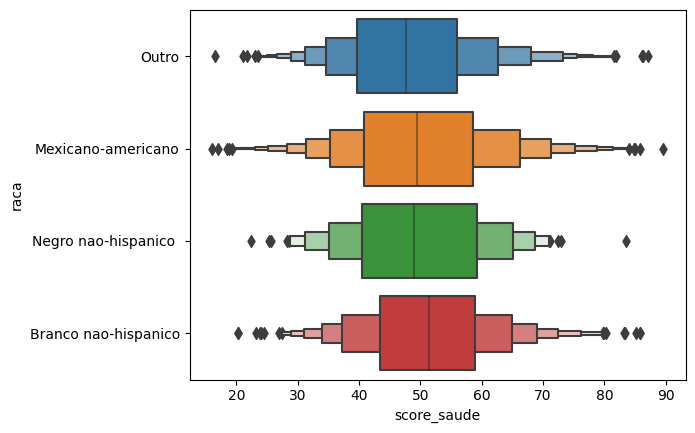

In [69]:
sns.boxenplot(data=df, y="raca", x="score_saude");

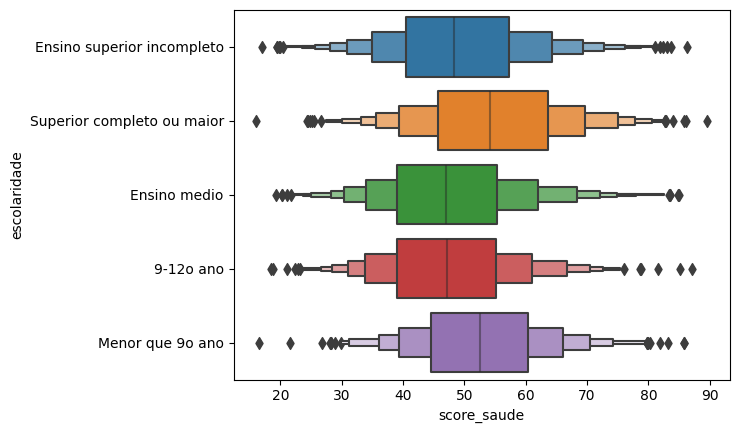

In [70]:
sns.boxenplot(data=df, y="escolaridade", x="score_saude");

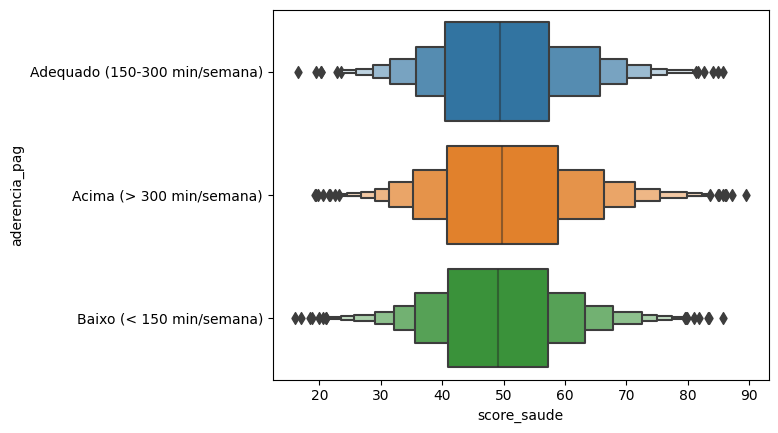

In [71]:
sns.boxenplot(data=df, y="aderencia_pag", x="score_saude");

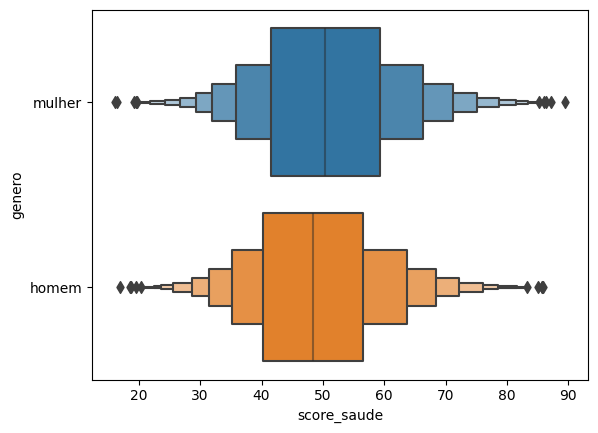

In [72]:
sns.boxenplot(data=df, y="genero", x="score_saude");

### Comparação das variáveis quantitativas com a pontuação das questões pessoais:

In [73]:
for i in quantitativas:
    print(i)
    print(df.groupby(["Q_somatorio"])[i].mean(), end='\n\n')

idade
Q_somatorio
0.0    44.907087
1.0    42.795632
2.0    44.398551
Name: idade, dtype: float64

renda_anual_familiar
Q_somatorio
0.0    7.071708
1.0    6.482059
2.0    5.329710
Name: renda_anual_familiar, dtype: float64

tempo_atividade_semanal_pag
Q_somatorio
0.0    489.060397
1.0    455.335846
2.0    286.915637
Name: tempo_atividade_semanal_pag, dtype: float64

total_vegetais
Q_somatorio
0.0    3.242561
1.0    3.070017
2.0    3.031196
Name: total_vegetais, dtype: float64

total_verdura-v-escura-leguminosas
Q_somatorio
0.0    1.822515
1.0    1.808638
2.0    1.560142
Name: total_verdura-v-escura-leguminosas, dtype: float64

total_frutas
Q_somatorio
0.0    2.524871
1.0    2.270161
2.0    2.212586
Name: total_frutas, dtype: float64

total_frutas_in-natura
Q_somatorio
0.0    2.398037
1.0    2.162023
2.0    2.051995
Name: total_frutas_in-natura, dtype: float64

total_graos-integrais
Q_somatorio
0.0    1.804626
1.0    1.692682
2.0    1.458790
Name: total_graos-integrais, dtype: float64

t

Com a excessão de: grãos refinados, sódio e proteínas, todas as outras variáveias apresentavam um índice menor naquelas pessoas com sintomas de depressão de pequenos a altos.

In [74]:
dado_raca = df.groupby(["raca"])["Q_somatorio"].value_counts().rename("Proporção").reset_index() 
dado_raca

,raca,Q_somatorio,Proporção
0,Branco nao-hispanico,0.0,736
1,Branco nao-hispanico,1.0,124
2,Branco nao-hispanico,2.0,56
3,Mexicano-americano,0.0,1771
4,Mexicano-americano,1.0,311
5,Mexicano-americano,2.0,113
6,Negro nao-hispanico,0.0,101
7,Negro nao-hispanico,1.0,29
8,Negro nao-hispanico,2.0,9
9,Outro,0.0,976


In [75]:
df.groupby(["genero"])["Q_somatorio"].value_counts().rename("Proporção").reset_index() 

,genero,Q_somatorio,Proporção
0,homem,0.0,1807
1,homem,1.0,250
2,homem,2.0,110
3,mulher,0.0,1777
4,mulher,1.0,391
5,mulher,2.0,166


In [76]:
dado_genero = df.groupby(["genero"])["Q_somatorio"].value_counts(normalize=True).rename("Proporção").reset_index()
dado_genero

,genero,Q_somatorio,Proporção
0,homem,0.0,0.833872
1,homem,1.0,0.115367
2,homem,2.0,0.050761
3,mulher,0.0,0.761354
4,mulher,1.0,0.167524
5,mulher,2.0,0.071123


### Gráficos em barra comparando o questionário:

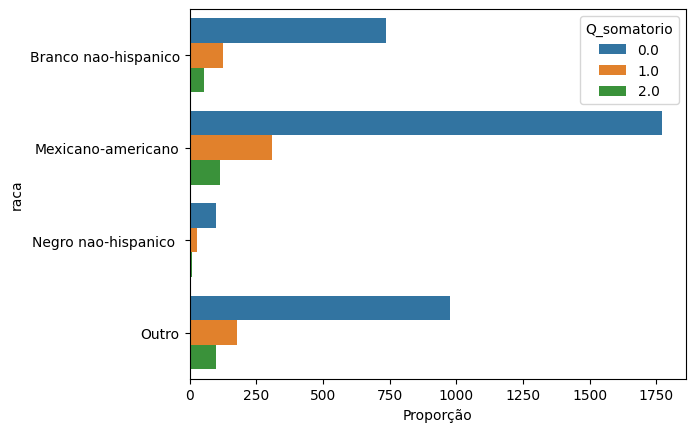

In [77]:
sns.barplot(y = dado_raca["raca"], x = dado_raca["Proporção"], hue = dado_raca["Q_somatorio"]);

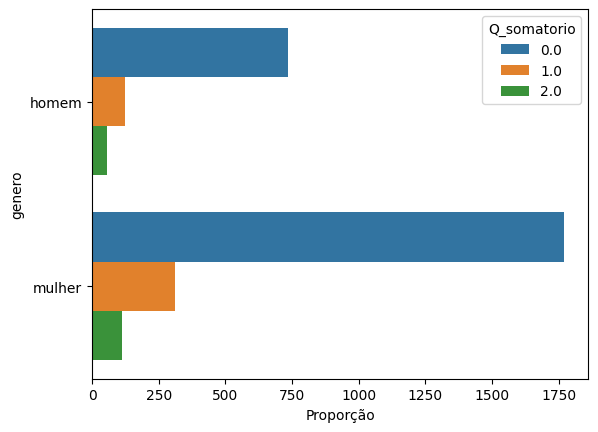

In [78]:
sns.barplot(y = dado_genero["genero"], x = dado_raca["Proporção"], hue = dado_raca["Q_somatorio"]);

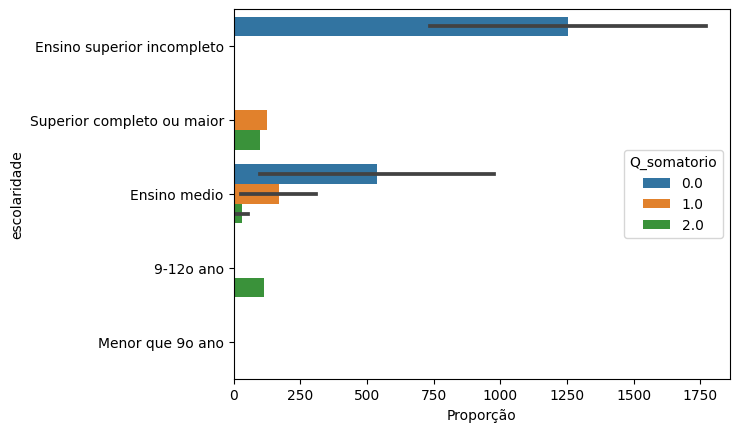

In [79]:
sns.barplot(y = df.escolaridade, x = dado_raca["Proporção"], hue = dado_raca["Q_somatorio"]);

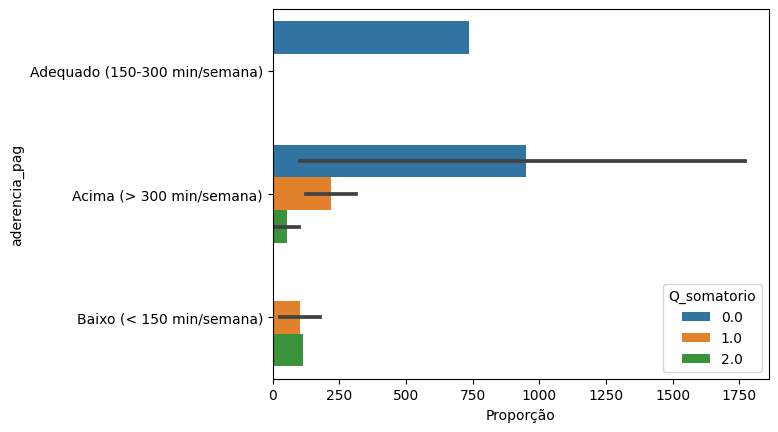

In [80]:

sns.barplot(y = df.aderencia_pag, x = dado_raca["Proporção"], hue = dado_raca["Q_somatorio"]);

### Conclusões:
A maioria dos entrevistados são de etnia mexicana-americana, fazem mais de 300 minutos de exercícios por semana. Uma pequena parcela que tem sintomas de depressão leve a grave. Brancos não hispânicos tem em média uma saúde melhor que negros não-hispânicos. A escolaridade também possuí grande influência na saúde, os com mais tempo de estudo tendem a ter uma saúde melhor. Mulheres tem em média um score de saúde melhor que homens, mas mais sintomas de depressão. A renda familiar também tem forte influência na saúde.